In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
data = pd.read_excel("../connectomes/mouse.xlsx", sheet_name=None)
metadata = pd.read_excel("../connectomes/mouse_meta.xlsx", sheet_name=None)

d = data["W_ipsi"]
p = data["PValue_ipsi"]

mtdt = metadata["Voxel Count_295 Structures"]
del(metadata)
mtdt = mtdt.loc[mtdt["Represented in Linear Model Matrix"] == "Yes"]

columns = []
cortices = [[0, 0]]
regions = mtdt["Major Region"].unique()
for region in regions:
    i = [columns.append(acronym.replace(" ", "")) for acronym in
         mtdt.loc[mtdt["Major Region"] == region, "Acronym"].values]
    cortices.append([cortices[-1][-1], cortices[-1][-1] + len(i)])
cortices.remove([0, 0])
del(mtdt)

d = d[columns].reindex(columns)
p = p[columns].reindex(columns)

d = d.values
p = p.values

p[np.isnan(p)] = 1

d[p > 0.01] = 0

n = np.zeros_like(d)

for i in [1e-3, 1e-1, 1]:
    n[d >= i] += 1
n[d == 0] = np.nan

In [130]:
sim = np.empty([n.shape[0] + (len(cortices) - 1), n.shape[1] + (len(cortices) - 1)])
sim[:] = 0

In [131]:
sim.shape

(225, 225)

In [132]:
for i, cortex0 in enumerate(cortices):
    for ii, cortex1 in enumerate(cortices):
        sim[(cortex0[0] + i):(cortex0[1] + i),
            (cortex1[0] + ii):(cortex1[1] + ii)] = n[cortex0[0]:cortex0[1],
                                                     cortex1[0]:cortex1[1]]

In [133]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["#777777", "#471064", "#21928B", "#F8E720"])
cmap = ListedColormap(["#000000", "#471064", "#21928B", "#F8E720"])

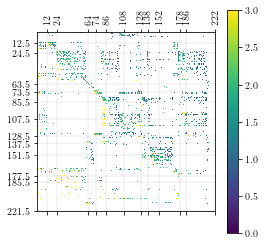

In [147]:
plt.matshow(n)
plt.xticks(xticks, [f"{round(i)}" for i in xticks], rotation="vertical")
plt.yticks(xticks)
plt.grid(lw=0.25)

plt.colorbar()
plt.savefig("n", dpi=700, bbox_inches="tight")

In [137]:
xticks = [cortex[1] + i + 0.5 for i, cortex in enumerate(cortices)][:-1]

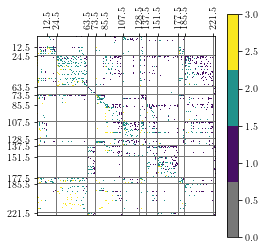

In [146]:
plt.matshow(sim, aspect="equal", cmap=cmap)
plt.tick_params(labeltop=True,
                top=True,
                labelbottom=False,
                bottom=False)
plt.xticks(xticks, rotation="vertical")
plt.yticks(xticks)
plt.colorbar()
plt.savefig("n", dpi=700, bbox_inches="tight")